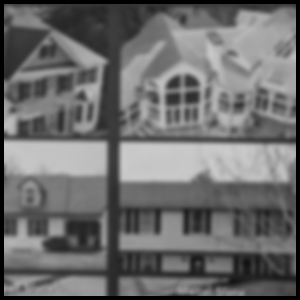

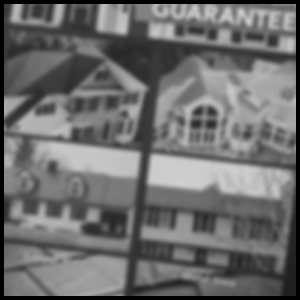

In [11]:
# Project 3 : Image Processing, Local feature descriptor, and model fitting

# 1. Image Filtering/Convolution

import numpy as np #Import numpy library
from google.colab.patches import cv2_imshow

# Read the input images
image1 = cv2.imread('pic1grey300.jpg', cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread('pic2grey300.jpg', cv2.IMREAD_GRAYSCALE)

# Define the parameters
N = 300
M = 9
sigma = M / 4.0

# Create a Gaussian filter and Initialize a 2D array for filter coefficients
g = np.zeros((M, M))

# Compute the Gaussian coefficients
for i in range(M):
    for j in range(M):
        x = i - (M - 1) / 2
        y = j - (M - 1) / 2
        g[i, j] = (1 / (2 * np.pi * sigma**2)) * np.exp(-(x**2 + y**2) / (2 * sigma**2))

# Normalize the filter coefficients
g /= np.sum(g)

# Create the output image
h1 = np.zeros((N, N), dtype=np.float32)
h2 = np.zeros((N, N), dtype=np.float32)

# Perform convolution for interior pixels
for i in range((M - 1) // 2, N - (M - 1) // 2):
    for j in range((M - 1) // 2, N - (M - 1) // 2):
        for k in range(M):
            for l in range(M):
                h1[i, j] += g[k, l] * image1[i - k + (M - 1) // 2, j - l + (M - 1) // 2]
                h2[i, j] += g[k, l] * image2[i - k + (M - 1) // 2, j - l + (M - 1) // 2]

# Display both output images
cv2_imshow(h1) #displaying output image-1
cv2_imshow(h2) #displaying output image-2


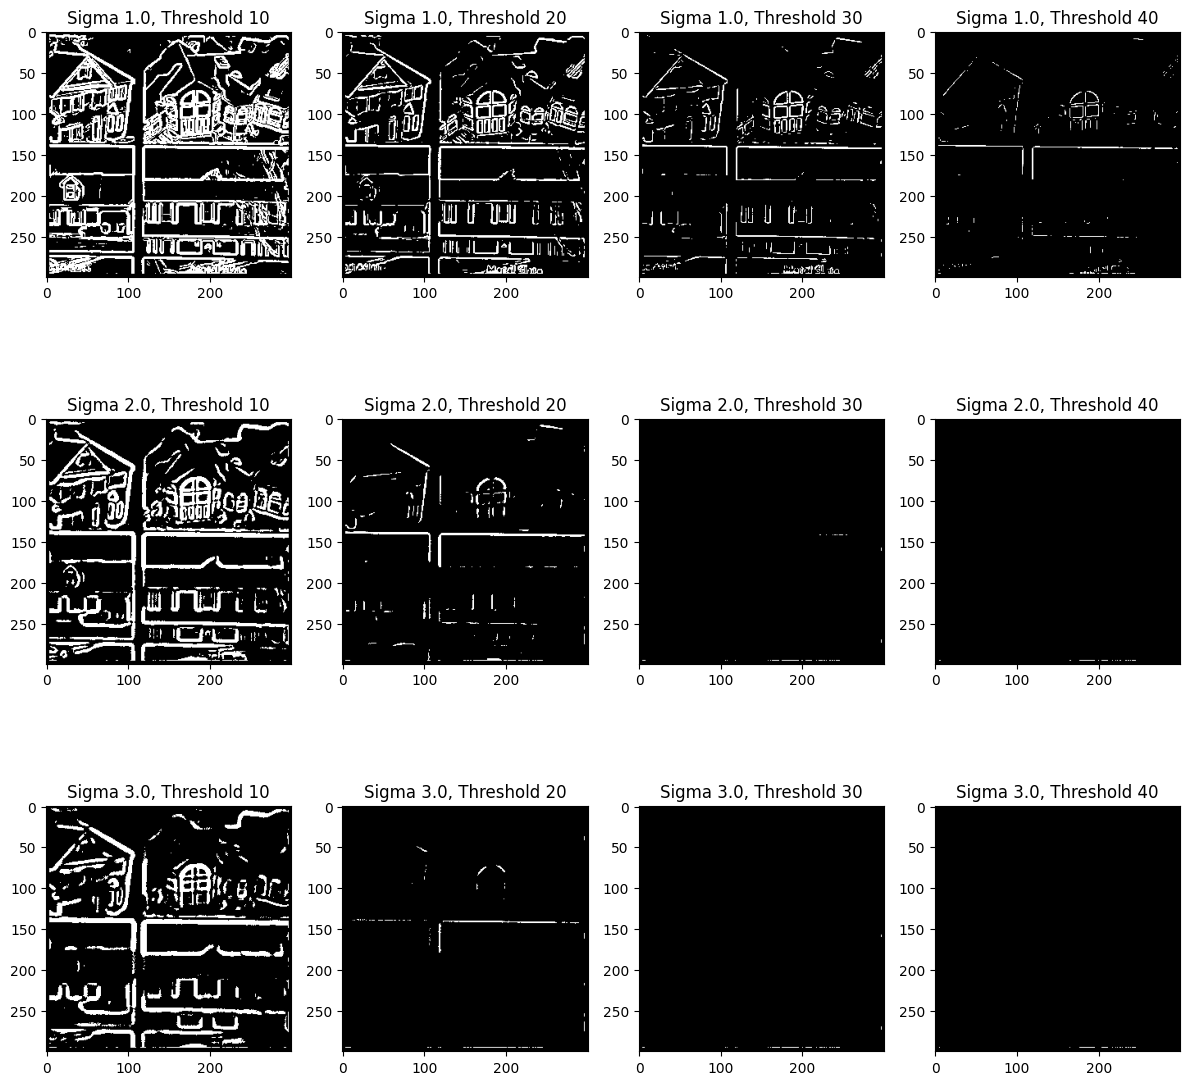

In [ ]:
# 2. Edge Detection

#Edge Detection for  First Image ('pic1grey300.jpg')

import numpy as np
import cv2
import matplotlib.pyplot as plt

# Read the first input image (N=300)
image = cv2.imread('pic1grey300.jpg', cv2.IMREAD_GRAYSCALE)

# Define the parameters
N = 300
M = 9
threshold_values = [10, 20, 30, 40]
sigma_values = [1.0, 2.0, 3.0]

# Create a subplot grid for displaying the images
num_rows = len(sigma_values)
num_cols = len(threshold_values)
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 12))

# Iterate through different sigma and threshold values
for i, sigma in enumerate(sigma_values):
    for j, threshold in enumerate(threshold_values):
        # Compute the 1D Gaussian filter along rows
        g = np.zeros(M)
        summ = 0
        for k in range(M):
            g[k] = np.exp(-((k - (M - 1) / 2) ** 2) / (2 * sigma ** 2))
            summ += g[k]

        # Normalize the filter coefficients
        g /= summ

        # Initialize temporary images for filtering
        h1 = np.copy(image)
        h2 = np.copy(image)

        # Filter along rows
        for x in range(N):
            for y in range((M - 1) // 2, N - (M - 1) // 2):
                summ = 0
                for k in range(M):
                    summ += g[k] * image[x, y - (k - (M - 1) // 2)]
                h1[x, y] = summ

        # Filter along columns
        for y in range(N):
            for x in range((M - 1) // 2, N - (M - 1) // 2):
                summ = 0
                for k in range(M):
                    summ += g[k] * h1[x - (k - (M - 1) // 2), y]
                h2[x, y] = summ

        # Compute the gradient magnitude and threshold
        output_image = np.zeros((N, N), dtype=np.uint8)
        for x in range((M - 1) // 2, N - (M - 1) // 2):
            for y in range((M - 1) // 2, N - (M - 1) // 2):
                hx = float(h2[x, y + 1]) - float(h2[x, y])
                hy = float(h2[x + 1, y]) - float(h2[x, y])
                gradient_magnitude = np.sqrt(hx ** 2 + hy ** 2)

                # Threshold and mark edge pixels
                if gradient_magnitude > threshold:
                    output_image[x, y] = 255  # Mark as edge pixel (maximum brightness)

        # Display the output image in the subplot
        axes[i, j].imshow(output_image, cmap='gray')
        axes[i, j].set_title(f'Sigma {sigma}, Threshold {threshold}')

plt.tight_layout()
plt.show()


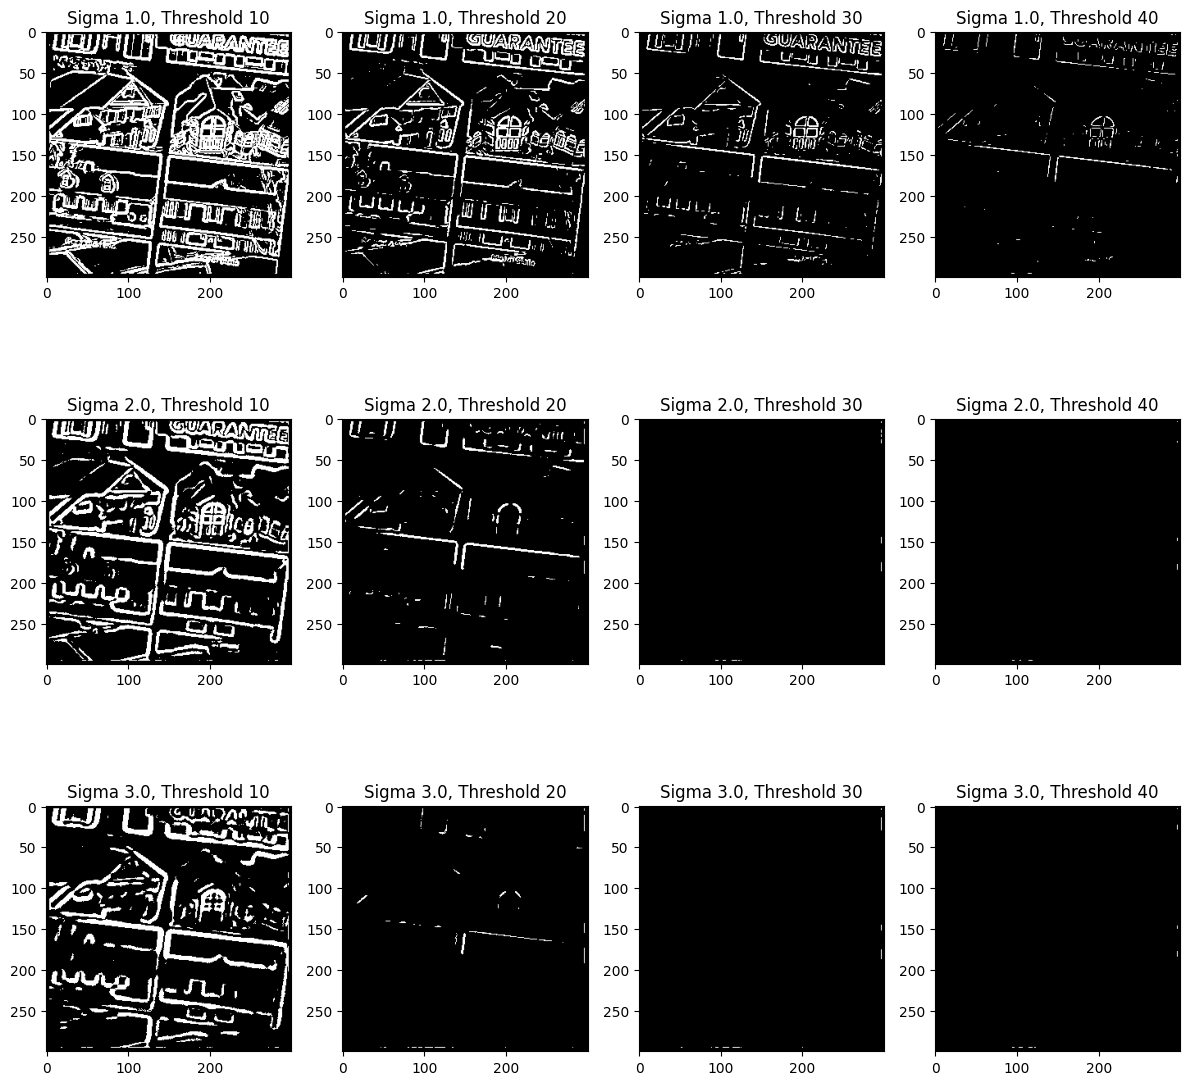

In [7]:
#Edge Detection for  Second input Image ('pic2grey300.jpg')

import numpy as np
import cv2
import matplotlib.pyplot as plt

# Read the Second input image (N=300)
image = cv2.imread('pic2grey300.jpg', cv2.IMREAD_GRAYSCALE)

# Define the parameters
N = 300
M = 9
threshold_values = [10, 20, 30, 40]
sigma_values = [1.0, 2.0, 3.0]

# Create a subplot grid for displaying the images
num_rows = len(sigma_values)
num_cols = len(threshold_values)
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 12))

# Iterate through different sigma and threshold values
for i, sigma in enumerate(sigma_values):
    for j, threshold in enumerate(threshold_values):
        # Compute the 1D Gaussian filter along rows
        g = np.zeros(M)
        summ = 0
        for k in range(M):
            g[k] = np.exp(-((k - (M - 1) / 2) ** 2) / (2 * sigma ** 2))
            summ += g[k]

        # Normalize the filter coefficients
        g /= summ

        # Initialize temporary images for filtering
        h1 = np.copy(image)
        h2 = np.copy(image)

        # Filter along rows
        for x in range(N):
            for y in range((M - 1) // 2, N - (M - 1) // 2):
                summ = 0
                for k in range(M):
                    summ += g[k] * image[x, y - (k - (M - 1) // 2)]
                h1[x, y] = summ

        # Filter along columns
        for y in range(N):
            for x in range((M - 1) // 2, N - (M - 1) // 2):
                summ = 0
                for k in range(M):
                    summ += g[k] * h1[x - (k - (M - 1) // 2), y]
                h2[x, y] = summ

        # Compute the gradient magnitude and threshold
        output_image = np.zeros((N, N), dtype=np.uint8)
        for x in range((M - 1) // 2, N - (M - 1) // 2):
            for y in range((M - 1) // 2, N - (M - 1) // 2):
                hx = float(h2[x, y + 1]) - float(h2[x, y])
                hy = float(h2[x + 1, y]) - float(h2[x, y])
                gradient_magnitude = np.sqrt(hx ** 2 + hy ** 2)

                # Threshold and mark edge pixels
                if gradient_magnitude > threshold:
                    output_image[x, y] = 255  # Mark as edge pixel (maximum brightness)

        # Display the output image in the subplot
        axes[i, j].imshow(output_image, cmap='gray')
        axes[i, j].set_title(f'Sigma {sigma}, Threshold {threshold}')

plt.tight_layout()
plt.show()

Pixel at (8,7) has histogram 0.0, 0.0, 0.2222222222222222, 0.2222222222222222, 0.5555555555555556, 0.0, 0.0, 0.0
Pixel at (8,292) has histogram 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0
Pixel at (9,240) has histogram 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0
Pixel at (12,241) has histogram 0.0, 0.0, 0.0, 0.3333333333333333, 0.6666666666666666, 0.0, 0.0, 0.0
Pixel at (15,8) has histogram 0.0, 0.0, 0.0, 0.0, 0.5555555555555556, 0.4444444444444444, 0.0, 0.0
Pixel at (23,14) has histogram 0.0, 0.0, 0.0, 0.0, 0.5555555555555556, 0.4444444444444444, 0.0, 0.0
Pixel at (23,233) has histogram 0.0, 0.0, 0.0, 0.2222222222222222, 0.4444444444444444, 0.3333333333333333, 0.0, 0.0
Pixel at (24,183) has histogram 0.0, 0.0, 0.0, 0.0, 0.5555555555555556, 0.4444444444444444, 0.0, 0.0
Pixel at (27,9) has histogram 0.0, 0.0, 0.0, 0.1111111111111111, 0.6666666666666666, 0.1111111111111111, 0.1111111111111111, 0.0
Pixel at (30,50) has histogram 0.0, 0.1111111111111111, 0.2222222222222222, 0.2222222222222222, 0.333

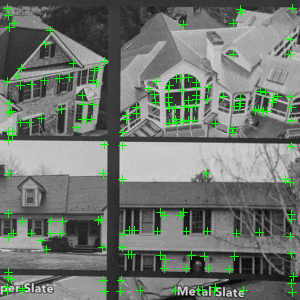

In [ ]:
# 3. Corner Detection and Local feature descriptor

# Implementing Corner Detection and Local feature descriptor to the first input image ('pic1grey300.jpg)

# 3 a : Corner detection

import numpy as np
import cv2
from google.colab.patches import cv2_imshow

# Read the First input image (N=300)
image_1 = cv2.imread('pic1grey300.jpg', cv2.IMREAD_GRAYSCALE)

# Define the parameters
N = 300
M = 9
threshold = 1500  # The threshold is set as 1500
histogram_bins = 8

# Initialize the output image for displaying detected corners
output_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

# Define convolution kernel for smoothing
sigma = 2 #sigma is set as 2
kernel_size = 9
conv_kernel = np.zeros((kernel_size, kernel_size))
for i in range(kernel_size):
    for j in range(kernel_size):
        x, y = i - (kernel_size - 1) // 2, j - (kernel_size - 1) // 2
        conv_kernel[i, j] = np.exp(-((x**2 + y**2) / (2 * sigma**2)))
conv_kernel /= np.sum(conv_kernel)

# Convolve the image with the defined convolution kernel
smoothed_image = np.zeros_like(image, dtype=np.float32)
for i in range(kernel_size // 2, N - kernel_size // 2):
    for j in range(kernel_size // 2, N - kernel_size // 2):
        smoothed_image[i, j] = np.sum(image[i - kernel_size // 2:i + kernel_size // 2 + 1,
                                          j - kernel_size // 2:j + kernel_size // 2 + 1] * conv_kernel)

# Calculate gradient vectors Ix and Iy (without using built-in functions)
Ix = np.zeros_like(image, dtype=np.float32)
Iy = np.zeros_like(image, dtype=np.float32)

for i in range(1, N - 1):
    for j in range(1, N - 1):
        Ix[i, j] = (smoothed_image[i, j + 1] - smoothed_image[i, j - 1]) / 2
        Iy[i, j] = (smoothed_image[i + 1, j] - smoothed_image[i - 1, j]) / 2

# Compute A, B, and C at each pixel
A = Ix**2
B = Iy**2
C = Ix * Iy

# Define convolution kernel for smoothing A, B, and C
sigma = 5.5 #sigma is set as 5.5
kernel_size = 11
conv_kernel = np.zeros((kernel_size, kernel_size))
for i in range(kernel_size):
    for j in range(kernel_size):
        x, y = i - (kernel_size - 1) // 2, j - (kernel_size - 1) // 2
        conv_kernel[i, j] = np.exp(-((x**2 + y**2) / (2 * sigma**2)))
conv_kernel /= np.sum(conv_kernel)

# Convolve A, B, and C with the defined convolution kernel
A_smoothed = np.zeros_like(image, dtype=np.float32)
B_smoothed = np.zeros_like(image, dtype=np.float32)
C_smoothed = np.zeros_like(image, dtype=np.float32)

for i in range(kernel_size // 2, N - kernel_size // 2):
    for j in range(kernel_size // 2, N - kernel_size // 2):
        A_smoothed[i, j] = np.sum(A[i - kernel_size // 2:i + kernel_size // 2 + 1,
                                    j - kernel_size // 2:j + kernel_size // 2 + 1] * conv_kernel)
        B_smoothed[i, j] = np.sum(B[i - kernel_size // 2:i + kernel_size // 2 + 1,
                                    j - kernel_size // 2:j + kernel_size // 2 + 1] * conv_kernel)
        C_smoothed[i, j] = np.sum(C[i - kernel_size // 2:i + kernel_size // 2 + 1,
                                    j - kernel_size // 2:j + kernel_size // 2 + 1] * conv_kernel)

# Compute the Harris corner response R
R = (A_smoothed * B_smoothed - C_smoothed**2) - 0.04 * (A_smoothed + B_smoothed)**2

# Threshold R and perform non-maxima suppression
for i in range(5, N - 5):
    for j in range(5, N - 5):
        max_neighbor_R = np.max(R[i - 1:i + 2, j - 1:j + 2])
        if R[i, j] > threshold and R[i, j] == max_neighbor_R:
            output_image[i - 4:i + 5, j] = [0, 255, 0]  # Vertical line
            output_image[i, j - 4:j + 5] = [0, 255, 0]  # Horizontal line

# 3 b : Local feature descriptor

# Compute the local feature descriptors for corner points
for i in range(5, N - 5):
    for j in range(5, N - 5):
        if np.all(output_image[i - 4:i + 5, j] == [0, 255, 0]).all() and np.all(output_image[i, j - 4:j + 5] == [0, 255, 0]).all():
            gradient_directions = np.arctan2(Iy[i - 1:i + 2, j - 1:j + 2], Ix[i - 1:i + 2, j - 1:j + 2])
            histogram = np.histogram(gradient_directions, bins=histogram_bins, range=(-np.pi, np.pi))[0]
            max_bin = np.argmax(histogram)
            normalized_histogram = np.roll(histogram, histogram_bins // 2 - max_bin).astype(float)
            normalized_histogram /= np.sum(normalized_histogram)
            print(f"Pixel at ({i},{j}) has histogram {', '.join(map(str, normalized_histogram))}") #Printing the histogram values

# Display the image with detected corner points
cv2_imshow(output_image) #displaying the image with detected corner points for first input image ('pic1grey300')


Pixel at (7,122) has histogram 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0
Pixel at (8,17) has histogram 0.0, 0.0, 0.0, 0.0, 0.6666666666666666, 0.1111111111111111, 0.0, 0.2222222222222222
Pixel at (8,59) has histogram 0.3333333333333333, 0.0, 0.1111111111111111, 0.0, 0.5555555555555556, 0.0, 0.0, 0.0
Pixel at (8,101) has histogram 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0
Pixel at (8,126) has histogram 0.0, 0.0, 0.1111111111111111, 0.2222222222222222, 0.5555555555555556, 0.1111111111111111, 0.0, 0.0
Pixel at (8,131) has histogram 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0
Pixel at (8,157) has histogram 0.0, 0.0, 0.0, 0.3333333333333333, 0.6666666666666666, 0.0, 0.0, 0.0
Pixel at (8,167) has histogram 0.0, 0.0, 0.0, 0.0, 0.7777777777777778, 0.2222222222222222, 0.0, 0.0
Pixel at (8,172) has histogram 0.1111111111111111, 0.1111111111111111, 0.0, 0.1111111111111111, 0.6666666666666666, 0.0, 0.0, 0.0
Pixel at (8,177) has histogram 0.0, 0.0, 0.0, 0.0, 0.7777777777777778, 0.1111111111111111, 0.111111111

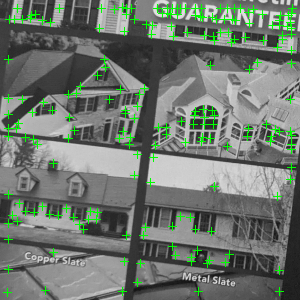

In [9]:
# Implementing Corner Detection and Local feature descriptor to the Second input image ('pic2grey300.jpg)

# 3 a : Corner Detection

import numpy as np
import cv2
from google.colab.patches import cv2_imshow

# Read the Second input image (N=300)
image = cv2.imread('pic2grey300.jpg', cv2.IMREAD_GRAYSCALE)

# Define the parameters
N = 300
M = 9
threshold = 1500  # The threshold is set as 1500
histogram_bins = 8

# Initialize the output image for displaying detected corners
output_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

# Define convolution kernel for smoothing (without using built-in functions)
sigma = 2     #sigma value is setted as 2
kernel_size = 9
conv_kernel = np.zeros((kernel_size, kernel_size))
for i in range(kernel_size):
    for j in range(kernel_size):
        x, y = i - (kernel_size - 1) // 2, j - (kernel_size - 1) // 2
        conv_kernel[i, j] = np.exp(-((x**2 + y**2) / (2 * sigma**2)))
conv_kernel /= np.sum(conv_kernel)

# Convolve the image with the defined convolution kernel
smoothed_image = np.zeros_like(image, dtype=np.float32)
for i in range(kernel_size // 2, N - kernel_size // 2):
    for j in range(kernel_size // 2, N - kernel_size // 2):
        smoothed_image[i, j] = np.sum(image[i - kernel_size // 2:i + kernel_size // 2 + 1,
                                          j - kernel_size // 2:j + kernel_size // 2 + 1] * conv_kernel)

# Calculate gradient vectors Ix and Iy (without using built-in functions)
Ix = np.zeros_like(image, dtype=np.float32)
Iy = np.zeros_like(image, dtype=np.float32)

for i in range(1, N - 1):
    for j in range(1, N - 1):
        Ix[i, j] = (smoothed_image[i, j + 1] - smoothed_image[i, j - 1]) / 2
        Iy[i, j] = (smoothed_image[i + 1, j] - smoothed_image[i - 1, j]) / 2

# Compute A, B, and C at each pixel
A = Ix**2
B = Iy**2
C = Ix * Iy

# Define convolution kernel for smoothing A, B, and C (without using built-in functions)
sigma = 5.5 #sigma value is setted as 5.5
kernel_size = 11
conv_kernel = np.zeros((kernel_size, kernel_size))
for i in range(kernel_size):
    for j in range(kernel_size):
        x, y = i - (kernel_size - 1) // 2, j - (kernel_size - 1) // 2
        conv_kernel[i, j] = np.exp(-((x**2 + y**2) / (2 * sigma**2)))
conv_kernel /= np.sum(conv_kernel)

# Convolve A, B, and C with the defined convolution kernel
A_smoothed = np.zeros_like(image, dtype=np.float32)
B_smoothed = np.zeros_like(image, dtype=np.float32)
C_smoothed = np.zeros_like(image, dtype=np.float32)

for i in range(kernel_size // 2, N - kernel_size // 2):
    for j in range(kernel_size // 2, N - kernel_size // 2):
        A_smoothed[i, j] = np.sum(A[i - kernel_size // 2:i + kernel_size // 2 + 1,
                                    j - kernel_size // 2:j + kernel_size // 2 + 1] * conv_kernel)
        B_smoothed[i, j] = np.sum(B[i - kernel_size // 2:i + kernel_size // 2 + 1,
                                    j - kernel_size // 2:j + kernel_size // 2 + 1] * conv_kernel)
        C_smoothed[i, j] = np.sum(C[i - kernel_size // 2:i + kernel_size // 2 + 1,
                                    j - kernel_size // 2:j + kernel_size // 2 + 1] * conv_kernel)

# Compute the Harris corner response R
R = (A_smoothed * B_smoothed - C_smoothed**2) - 0.04 * (A_smoothed + B_smoothed)**2

# Threshold R and perform non-maxima suppression
for i in range(5, N - 5):
    for j in range(5, N - 5):
        max_neighbor_R = np.max(R[i - 1:i + 2, j - 1:j + 2])
        if R[i, j] > threshold and R[i, j] == max_neighbor_R:
            # Replace the dot with a larger plus symbol
            output_image[i - 4:i + 5, j] = [0, 255, 0]  # Vertical line
            output_image[i, j - 4:j + 5] = [0, 255, 0]  # Horizontal line

# 3 b : Local feature descriptor

# Compute local feature descriptors for corner points
for i in range(5, N - 5):
    for j in range(5, N - 5):
        if np.all(output_image[i - 4:i + 5, j] == [0, 255, 0]).all() and np.all(output_image[i, j - 4:j + 5] == [0, 255, 0]).all():
            gradient_directions = np.arctan2(Iy[i - 1:i + 2, j - 1:j + 2], Ix[i - 1:i + 2, j - 1:j + 2])
            histogram = np.histogram(gradient_directions, bins=histogram_bins, range=(-np.pi, np.pi))[0]
            max_bin = np.argmax(histogram)
            normalized_histogram = np.roll(histogram, histogram_bins // 2 - max_bin).astype(float)
            normalized_histogram /= np.sum(normalized_histogram)
            print(f"Pixel at ({i},{j}) has histogram {', '.join(map(str, normalized_histogram))}")

# Display the image with detected corner points
cv2_imshow(output_image)  #displaying the image with detected corner points for second input image ('pic1grey300')


In [10]:
# 4. Image Matching

import numpy as np

# Define matching corner points in the first and second images (at least 15 pairs)

# 15 matching points are manually plotted for both the images

matching_points_first_image = np.array([
    [50,29],
    [72,61],
    [20,67],
    [103,61],
    [183,23],
    [232,22],
    [215,122],
    [240,98],
    [206,98],
    [121,145],
    [122,179],
    [103,172],
    [102,247],
    [62,221],
    [22,221],
])

matching_points_second_image = np.array([

    [104,58],
    [120,89],
    [79,86],
    [143,87],
    [210,65],
    [249,68],
    [228,146],
    [248,128],
    [214,185],
    [153,157],
    [150,182],
    [134,174],
    [126,234],
    [98,212],
    [42,206],
])

# Construct the linear system of equations Ax=b for the affine transformation
A = np.zeros((2 * len(matching_points_first_image), 6))
b = np.zeros((2 * len(matching_points_first_image),))

for i in range(len(matching_points_first_image)):
    x, y = matching_points_first_image[i]
    x_prime, y_prime = matching_points_second_image[i]

    A[2 * i] = [x, y, 1, 0, 0, 0]
    A[2 * i + 1] = [0, 0, 0, x, y, 1]

    b[2 * i] = x_prime
    b[2 * i + 1] = y_prime

# Solve the linear system using the least-squares method
parameters, residuals, rank, singular_values = np.linalg.lstsq(A, b, rcond=None)

# Extract the affine transformation matrix and translation vector
a, b, c, d, e, f = parameters
affine_matrix = np.array([[a, b, c], [d, e, f]])
translation_vector = np.array([c, f])

# Print the affine matrix
print("Affine Transformation Matrix:")
print(affine_matrix)

# Print the translation vector
print("Translation Vector:")
print(translation_vector)


Affine Transformation Matrix:
[[ 0.80368238 -0.10939811 66.79824152]
 [ 0.14530665  0.78897621 27.62765281]]
Translation Vector:
[66.79824152 27.62765281]
